In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib notebook

In [2]:
density_grids = []

In [3]:
grid_len = 151
for i in range(8):
    dens_grid = np.fromfile("density_grid.{}".format(i), dtype=np.float32, count=grid_len**3)
    density_grids.append(dens_grid.reshape([grid_len,grid_len,grid_len]))

In [4]:
density_grid = np.array(density_grids).sum(0)
density_grid.shape

(151, 151, 151)

In [5]:
log_density_grid = np.log(density_grid+1e-2)

<IPython.core.display.Javascript object>


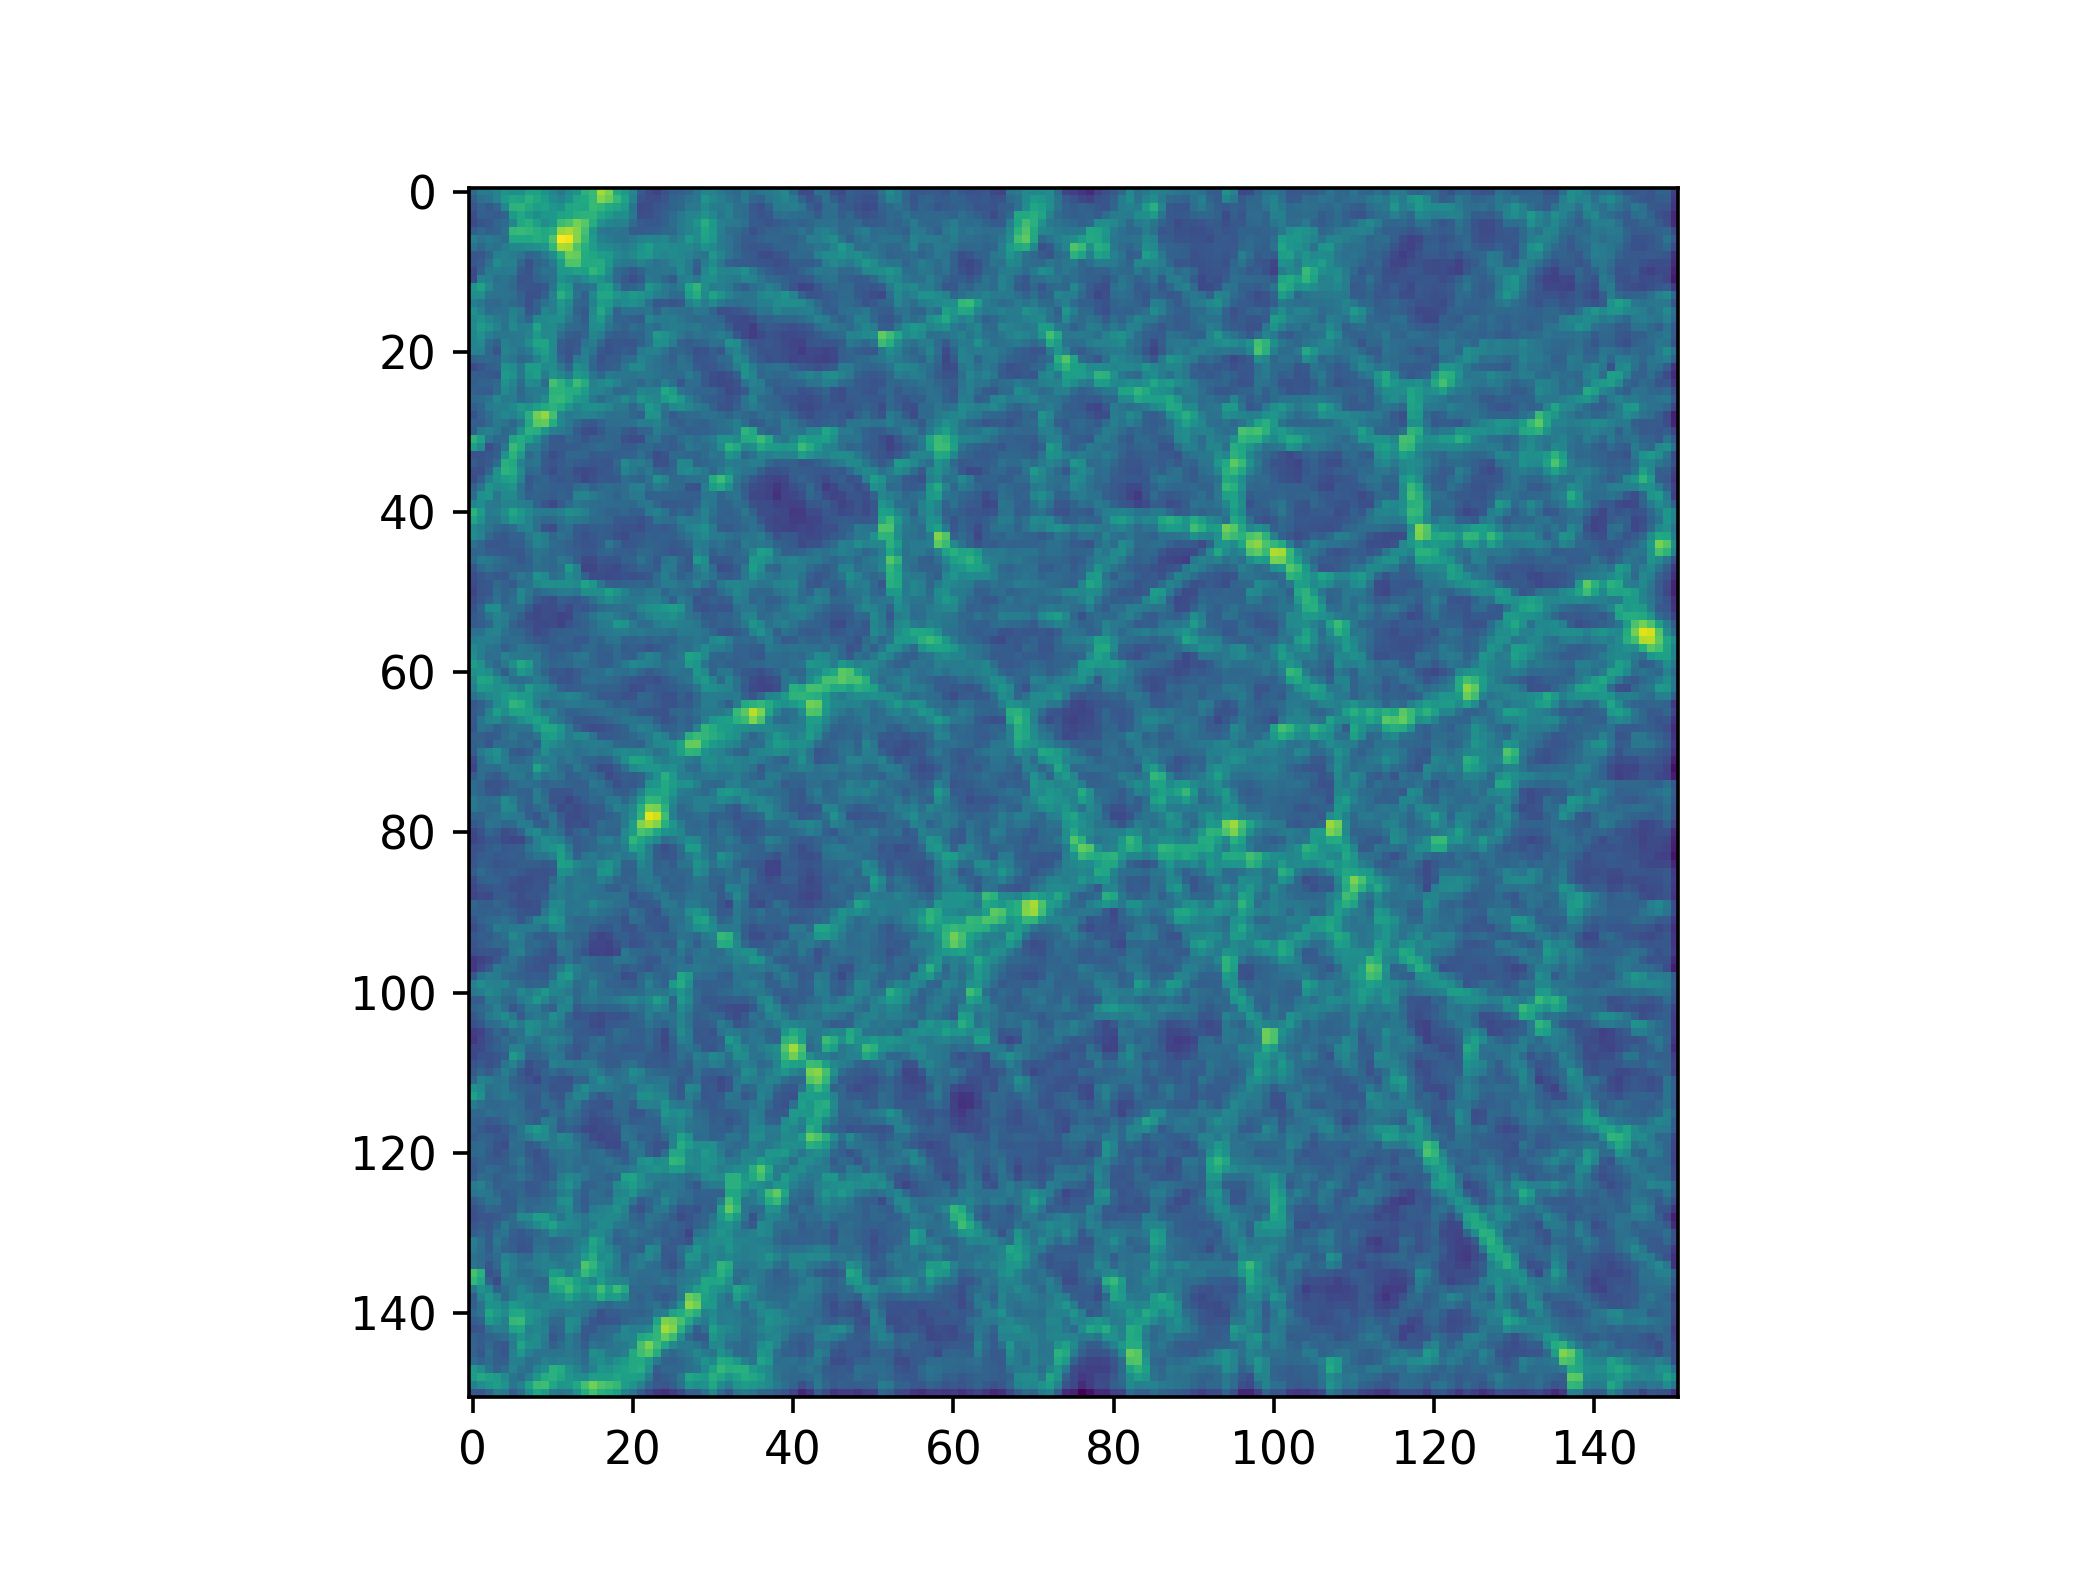

In [6]:
plt.figure(dpi=120)
plt.imshow(log_density_grid[:,:,10])

<IPython.core.display.Javascript object>


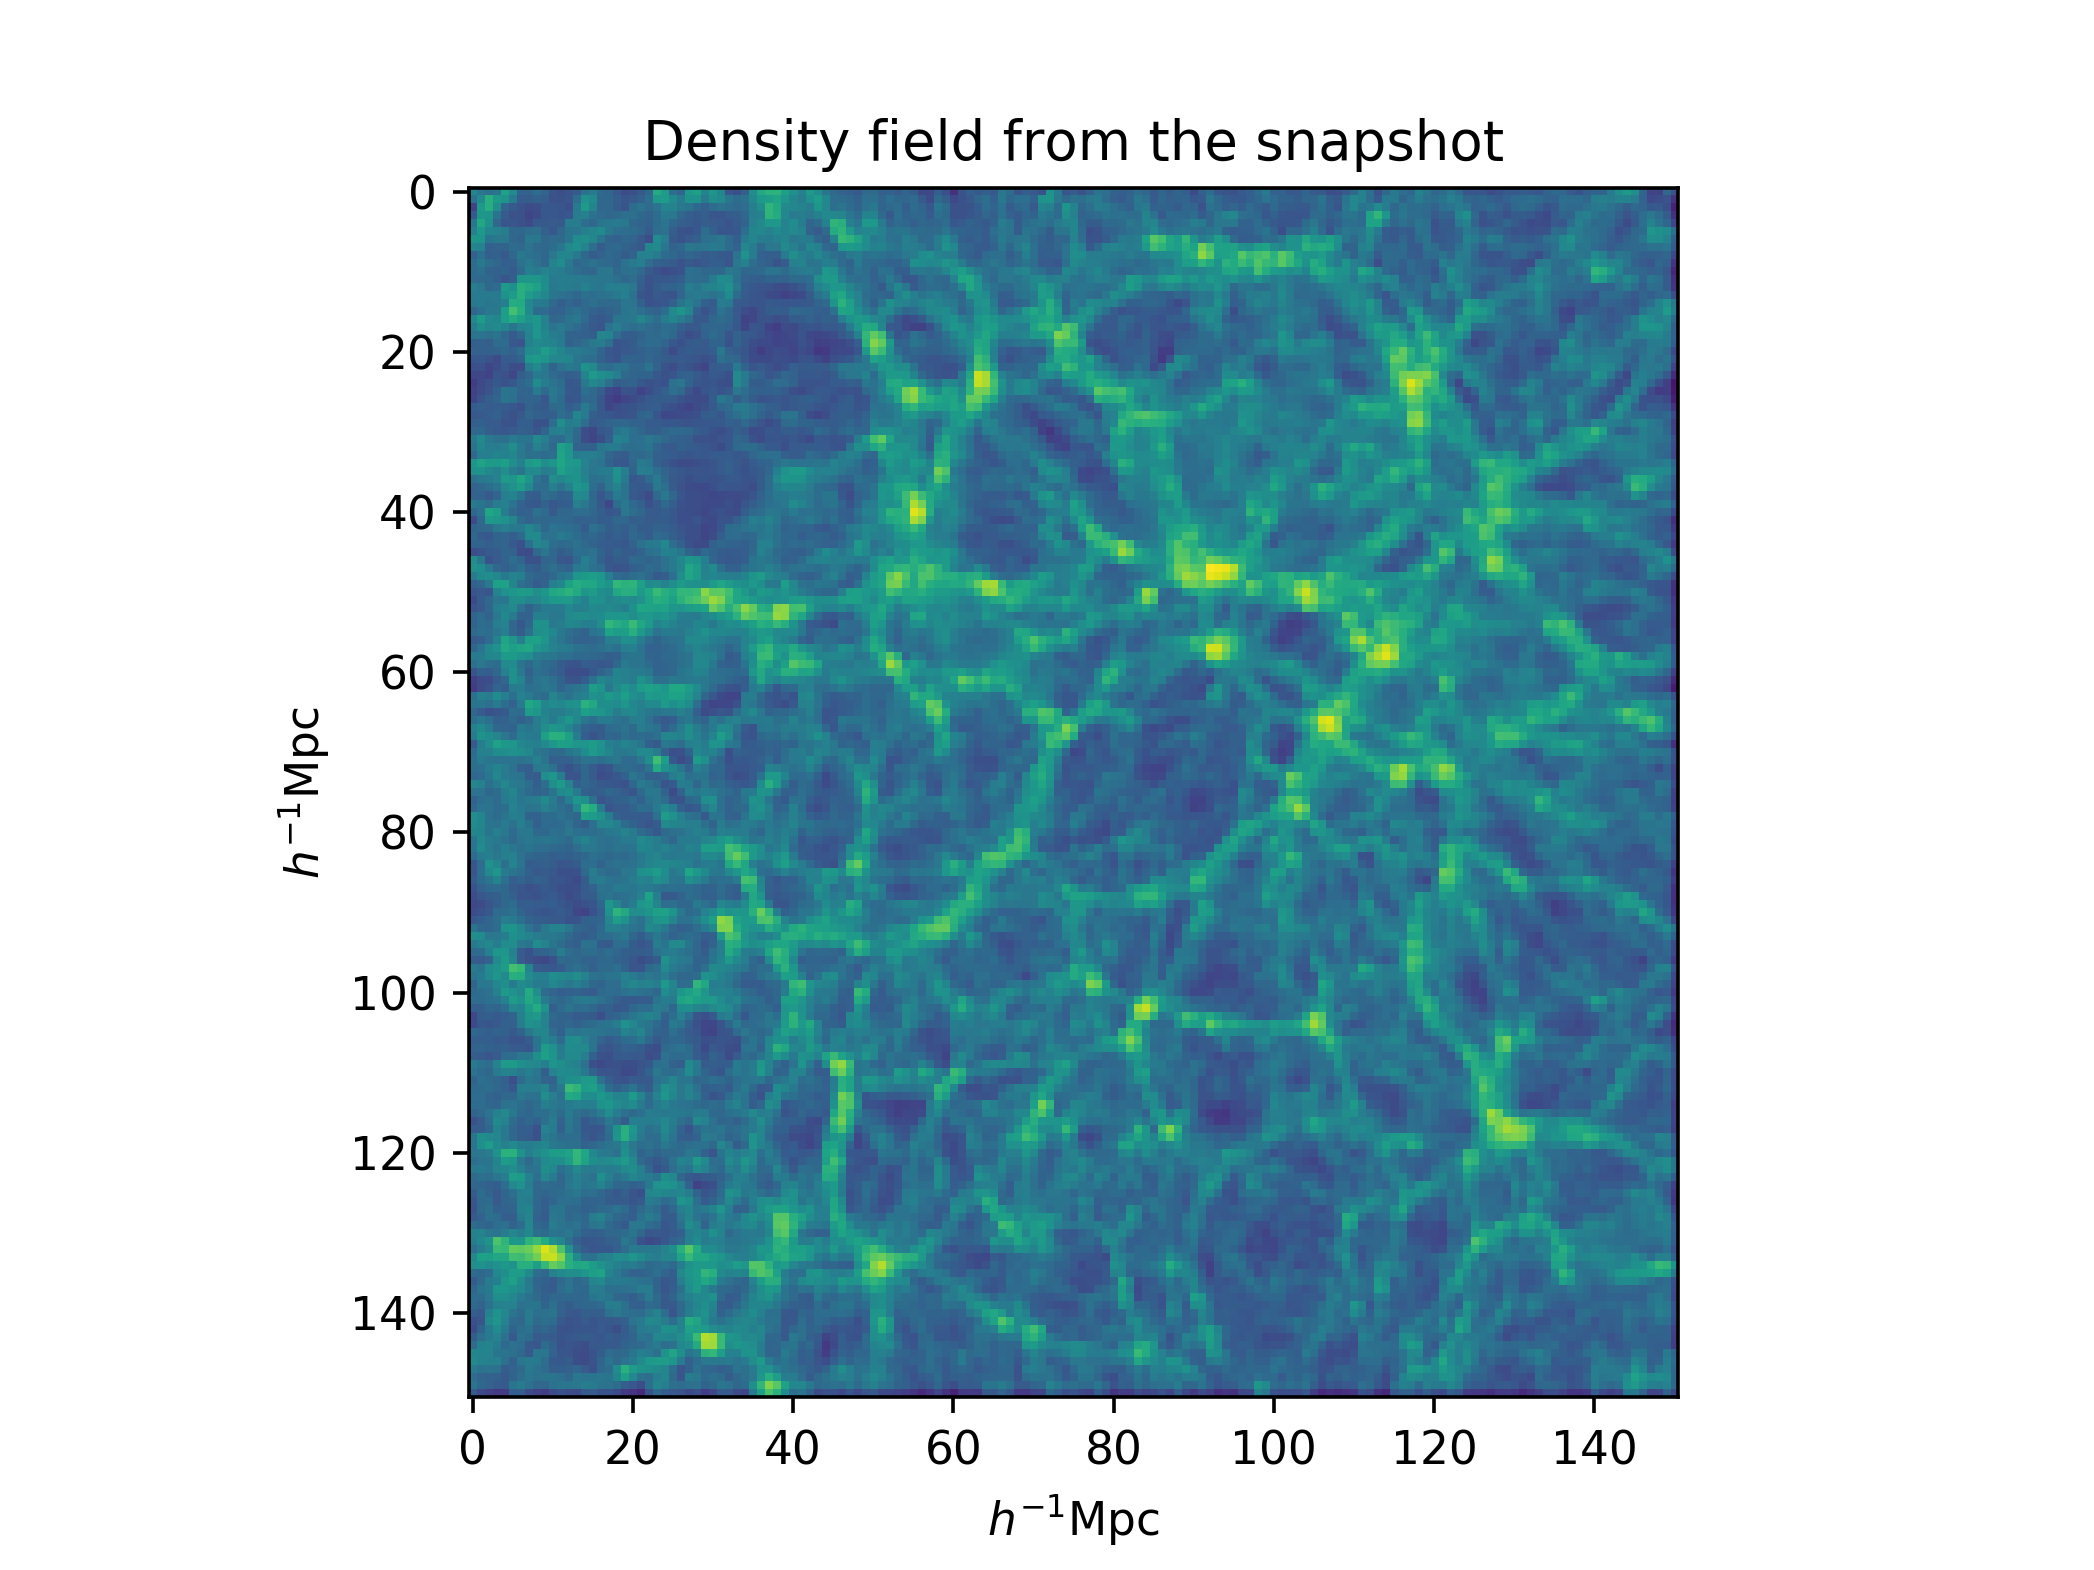

interactive(children=(IntSlider(value=75, description='third_direction', max=150), Output()), _dom_classes=('w…

In [7]:
# Jupyter based interaction
from ipywidgets import interact
plt.figure(dpi=120)
im = plt.imshow(log_density_grid[:,:,10])
plt.title("Density field from the snapshot")
plt.xlabel("$h^{-1}$Mpc")
plt.ylabel("$h^{-1}$Mpc")
@interact(third_direction=(0,150))
def show2D(third_direction):
    im.set_data(log_density_grid[:,:,int(third_direction)])

In [8]:
from gaussian_random_field.random_fields import GaussianRandomField

In [9]:
density_field = GaussianRandomField()
density_field.set_field(log_density_grid)

<IPython.core.display.Javascript object>


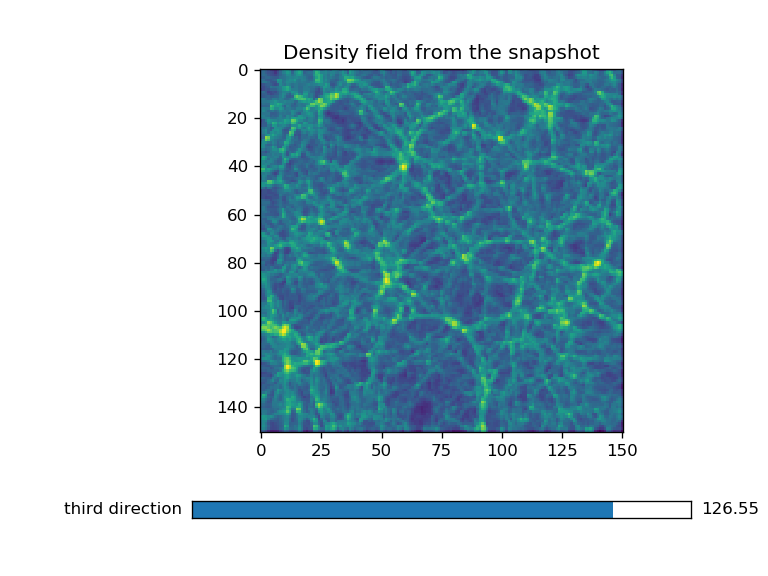

In [10]:
density_field.visualise(title="Density field from the snapshot")